## Imports

In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

INPUT_RAW_DIR = "data/raw"
OUTPUT_DIR    = "data/output"
FIGURES_DIR = "figures"

cross_arbs = pd.read_csv(os.path.join(OUTPUT_DIR, "filtered_cross_chain_swaps.csv"))

## Simple Analysis

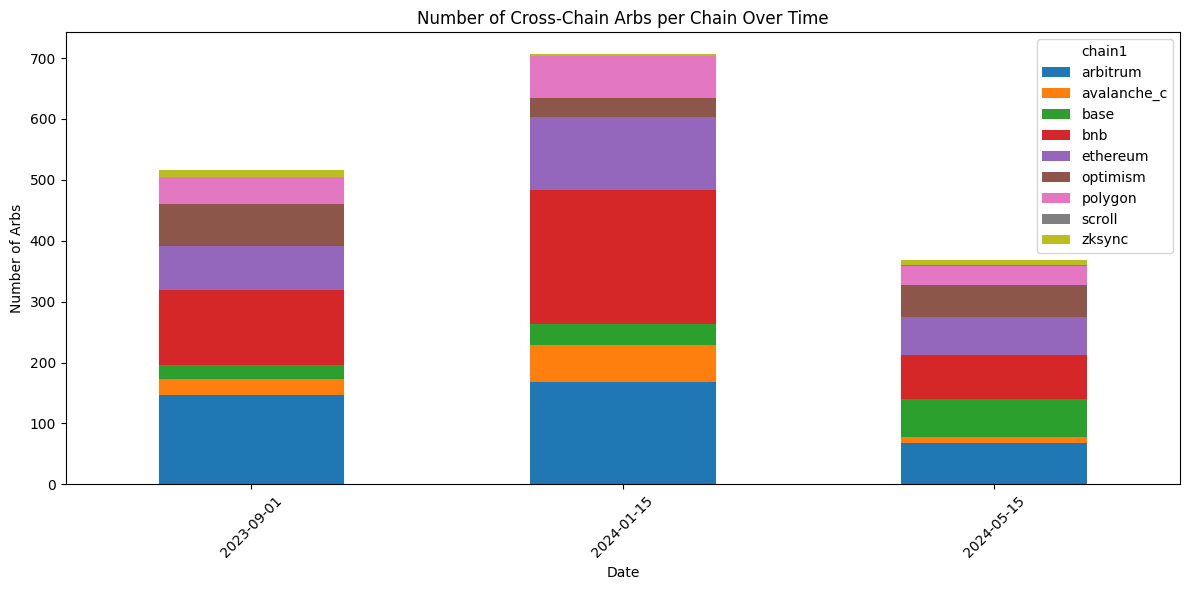

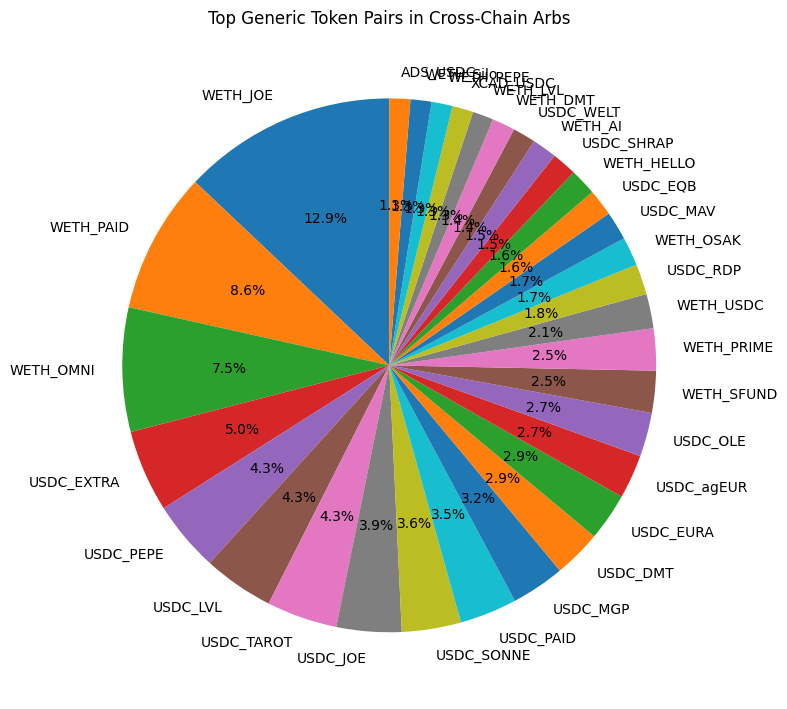

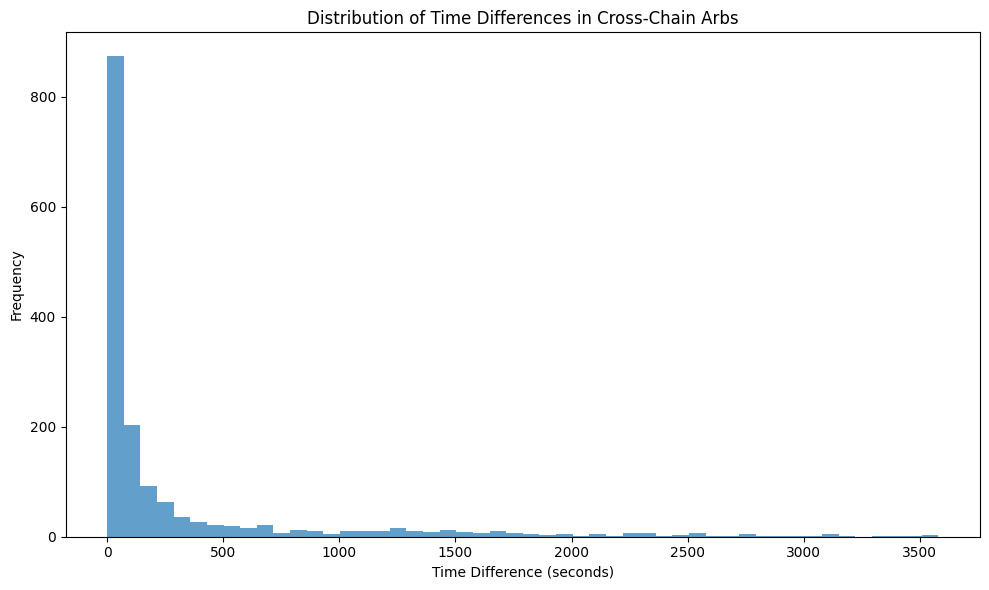

In [2]:
cross_arbs["bt1"] = pd.to_datetime(cross_arbs["bt1"])
cross_arbs["bt2"] = pd.to_datetime(cross_arbs["bt2"])
cross_arbs["date"] = cross_arbs["bt1"].dt.date

# ── Simple Analysis ──
# Count matches per chain and date
matches_per_chain = cross_arbs.groupby(["chain1", "date"]).size().reset_index(name="count")
matches_per_chain_pivot = matches_per_chain.pivot(index="date", columns="chain1", values="count").fillna(0)
matches_per_chain_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Number of Cross-Chain Arbs per Chain Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Arbs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "cross_chain_arbs_per_chain.png"))
plt.show()
# Count generic_token_pair occurrences and do a pie chart
token_pair_counts = cross_arbs["generic_token_pair"].value_counts()
top_pairs = token_pair_counts[token_pair_counts > 10]
top_pairs.plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title("Top Generic Token Pairs in Cross-Chain Arbs")
plt.ylabel("")  # Hide y-label for aesthetics
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "top_generic_token_pairs.png"))
plt.show()
# Do a histogram of time_diff values
cross_arbs["time_diff"].abs().plot(kind="hist", bins=50, figsize=(10, 6), alpha=0.7)
plt.title("Distribution of Time Differences in Cross-Chain Arbs")
plt.xlabel("Time Difference (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "time_diff_distribution.png"))
plt.show()